In [1]:
import sys
import sklearn
import numpy as np
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

#Pretty graphs
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#Saving figures/graphs
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#Downloading data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
#Loading data into the environment
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
# to make this notebook's output identical at every run
np.random.seed(42)

#### Download, Inspect, Analyze data

In [6]:
fetch_housing_data()
housing = load_housing_data()

In [7]:
housing.describe()
#housing.info()
housing.head()
housing["ocean_proximity"].value_counts()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Saving figure attribute_histogram_plots


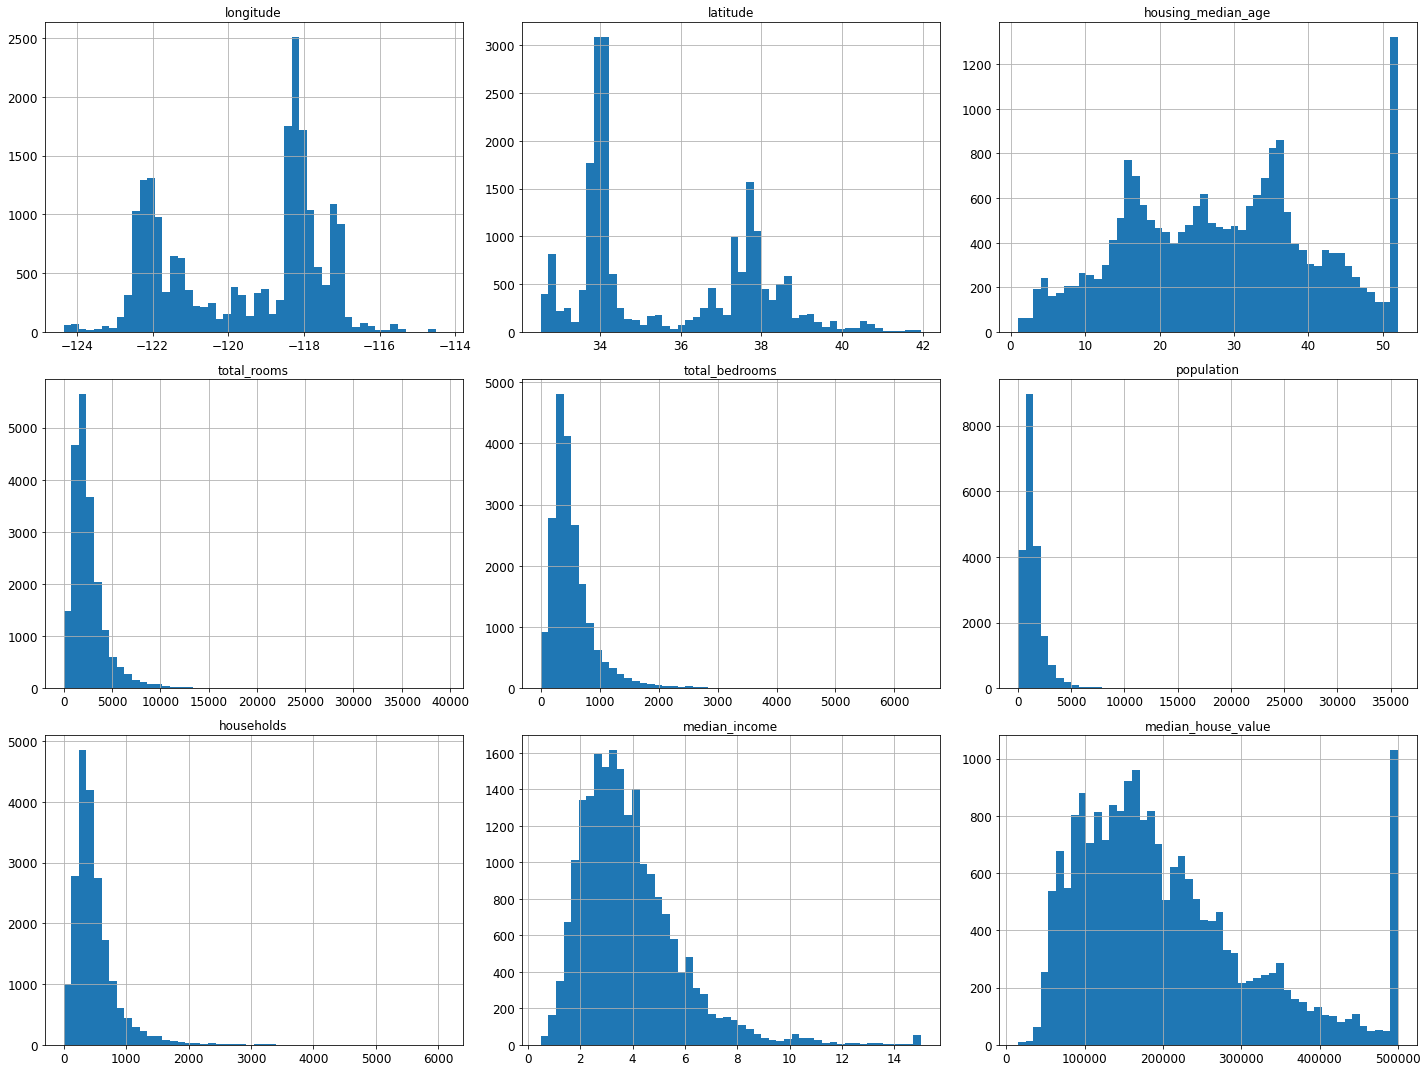

In [8]:
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")

#### Preparing date for a test train split

<AxesSubplot:>

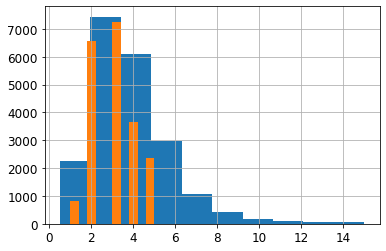

In [9]:
#categorizing data from median income feature into income_cat column
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])

housing["median_income"].hist()
housing["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#split housing data into two df's that have the same proportion of categories from income_cat
#so that our data is uniformly distributed with respect to the catogries from income_cat
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
#Dropping the just created income_cat column since we already used it to the fullest
for df in (strat_test_set, strat_train_set):
    df.drop("income_cat", axis=1, inplace=True, errors="ignore")

#### Inspecting the patterns in the test set

Saving figure District_density_map


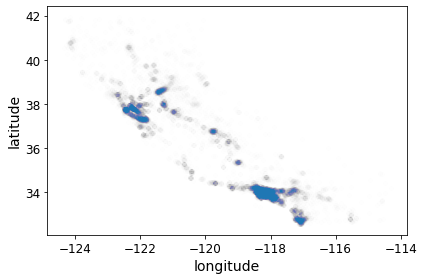

In [12]:
#Full copy just in case & and now we forget about the start_test_set and don't look at it
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.00197)
save_fig("District_density_map")

Saving figure housing_prices_scatterplot


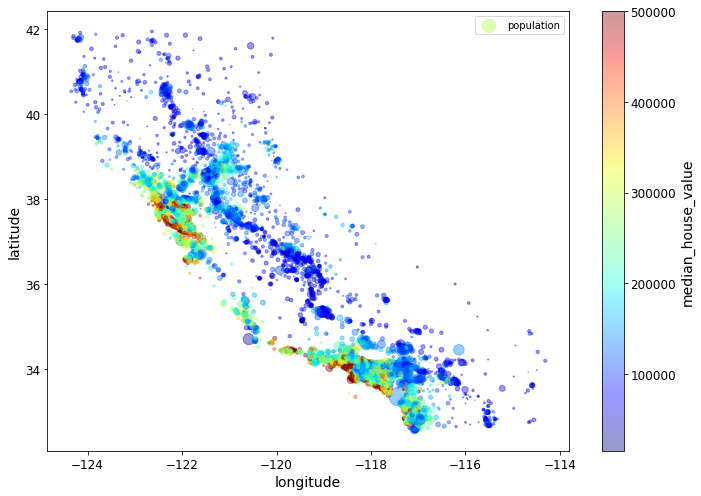

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [14]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


Saving figure scatter_matrix_plot


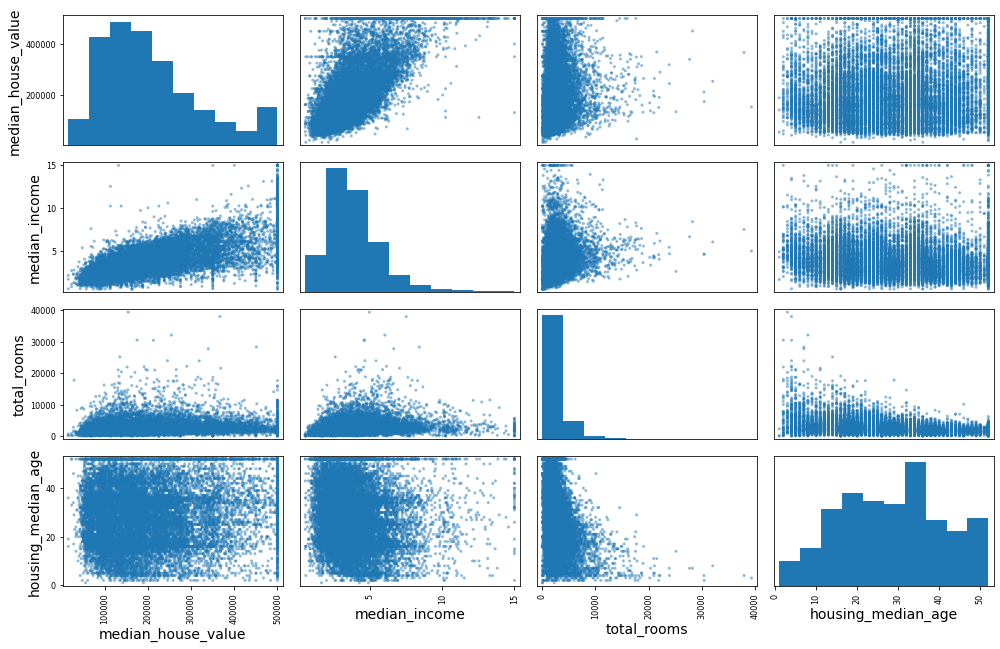

In [15]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(14, 9))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


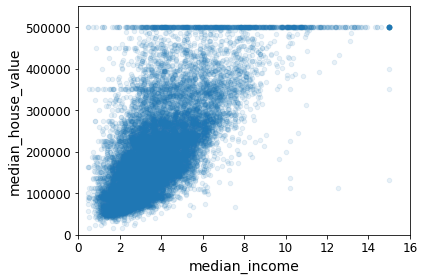

In [16]:
housing.plot(y="median_house_value", x="median_income", alpha=0.1, kind="scatter")
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

#### Prepare Data for ML algorithm, creating a pipiline | Production Code starts here

In [17]:
#not a copy it is a reference to the same df but not all of the features
housing = strat_train_set.drop("median_house_value", axis=1, errors="ignore")
housing_labels = strat_train_set[["median_house_value"]].copy()

In [18]:
# 1. filling out missing values
from sklearn.impute import SimpleImputer

In [19]:
# 2. Feature engineering, adding additional non linear transformations of the original columns
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):   
        col_names = "total_rooms", "total_bedrooms", "population", "households"
        rooms_ix, bedrooms_ix, population_ix, households_ix = [
            housing.columns.get_loc(c) for c in col_names] # get the column indices
        
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [20]:
#3. stadartization of values
from sklearn.preprocessing import StandardScaler

#Creating pipiline that works only on numerical columns and goes through all 3 steps
from sklearn.pipeline import Pipeline


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [21]:
# for converting categorical feature to numerical
from sklearn.preprocessing import OneHotEncoder

# to concatanate the result of numerical and catogorical pipelines
from sklearn.compose import ColumnTransformer

cat_features = ["ocean_proximity"]
num_features = list(housing.drop(cat_features, axis=1))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features)
    ])

In [22]:
#Fit the pipeline to the train data
full_pipeline.fit(housing)

X = full_pipeline.transform(housing)
y = np.array(housing_labels)

#### Model Selection

In [23]:
from sklearn.metrics import mean_squared_error

def model_score_full_train(*model_list):
    """Evaluating the performance of the model with RMSE on the training set"""
    answer = dict()
    for model in model_list:
        model.fit(X, y)
        error = mean_squared_error(model.predict(X), y, squared=False)
        answer[model.__class__] = round(error)
    return answer

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor()
svr = SVR(kernel="linear")

model_score_full_train(lr, dtr, rfr, svr)

/tmp/ipykernel_12197/4160173549.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)
/home/ja/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{sklearn.linear_model._base.LinearRegression: 68628,
 sklearn.tree._classes.DecisionTreeRegressor: 0,
 sklearn.ensemble._forest.RandomForestRegressor: 18577,
 sklearn.svm._classes.SVR: 111095}

In [27]:
from sklearn.model_selection import cross_val_score

def cross_val_average(*model_list):
    answer = dict()
    for model in model_list:
        scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=2)
        scores = np.sqrt(-scores)
        answer[model.__class__] = np.round(np.average(scores))
    return answer
    
cross_val_average(lr, dtr, rfr, svr)


/home/ja/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ja/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ja/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ja/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

{sklearn.linear_model._base.LinearRegression: 69394.53357810916,
 sklearn.tree._classes.DecisionTreeRegressor: 73676.23006848393,
 sklearn.ensemble._forest.RandomForestRegressor: 52044.89833154606,
 sklearn.svm._classes.SVR: 114876.30013855456}